In [107]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, BasicAer, execute
from qiskit.tools.visualization import plot_histogram

In [104]:
n = 5
initial_position = 2
n_swipes = 1
phi = np.pi / 4

#

excitations_qr = QuantumRegister(n)
excitations_cr = ClassicalRegister(n)
qc = QuantumCircuit(excitations_qr, excitations_cr)

qc.x(excitations_qr[initial_position])

for swipe in range(n_swipes):
    left_indices = list(range(max(0, initial_position - swipe - 1), initial_position))
    right_indices = list(range(initial_position, min(initial_position + swipe + 1, n - 1)))
    #for k in left_indices + right_indices:
    for k in right_indices + left_indices:
        qc.x(excitations_qr[k])
        qc.cx(excitations_qr[k], excitations_qr[k + 1])
        qc.x(excitations_qr[k])
        
        qc.rz(phi, excitations_qr[k])
        qc.x(excitations_qr[k + 1])
        qc.rx(np.pi / 4, excitations_qr[k])
        qc.cz(excitations_qr[k + 1], excitations_qr[k])
        qc.rx(-np.pi / 4, excitations_qr[k])
        qc.cz(excitations_qr[k + 1], excitations_qr[k])
        qc.x(excitations_qr[k + 1])
        qc.rz(-phi, excitations_qr[k])
        
        qc.x(excitations_qr[k])
        qc.cx(excitations_qr[k], excitations_qr[k + 1])
        qc.x(excitations_qr[k])

qc.measure(excitations_qr, excitations_cr)

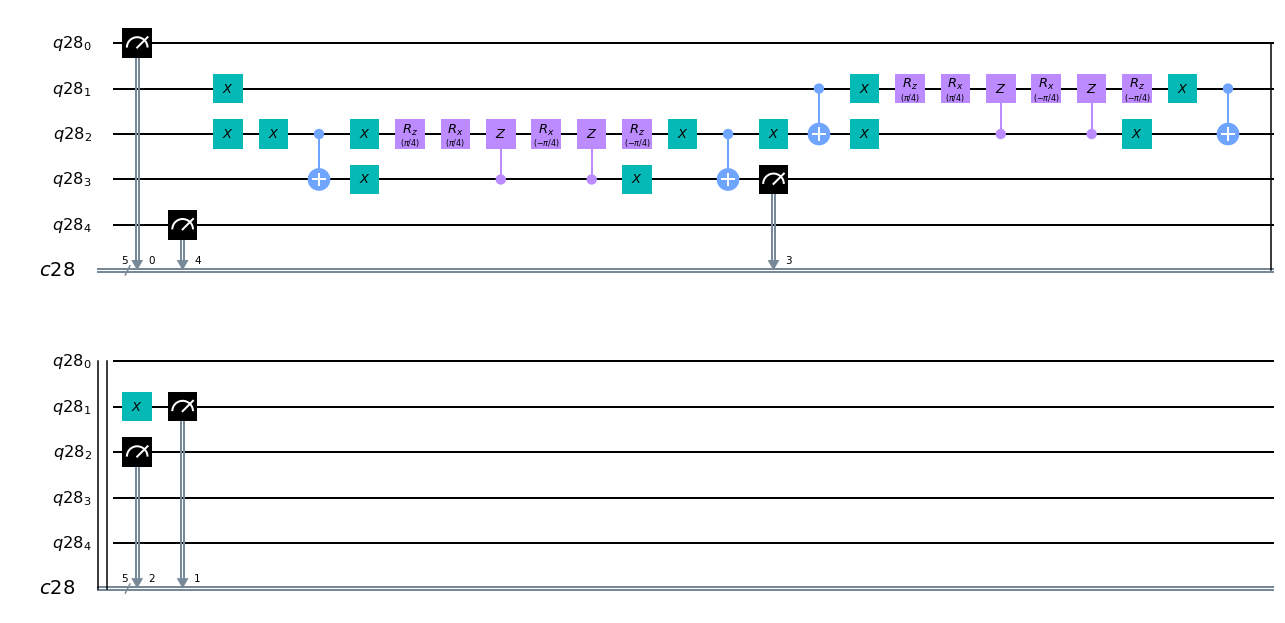

In [105]:
qc.draw(output="mpl")

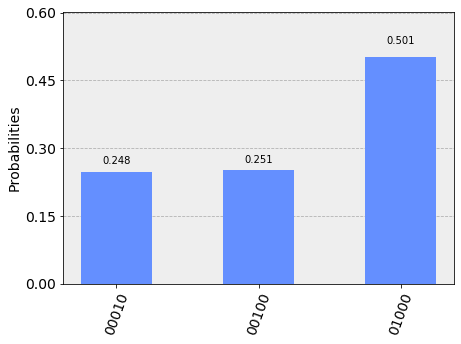

In [106]:
job = execute(qc, backend=BasicAer.get_backend("qasm_simulator"), shots=100000)
result = job.result()
plot_histogram(result.get_counts(qc))

In [98]:
counts = result.get_counts()
x_values = [ -2 ** (n - 1) * int(x / (2 ** (n - 1))) + x % (2 ** (n - 1)) for x in range(2 ** n) ]
x_strings = [ ("{0:0" + str(n) + "b}").format(x) for x in range(2 ** n)  ]
y_values = [ counts[x_strings[x]] if x_strings[x] in counts else 0 for x in range(2 ** n) ]

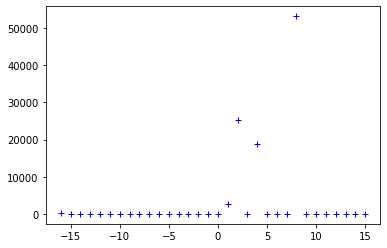

In [99]:
plt.plot(x_values, y_values, "b+")